In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import stats
import math

Boltzmann_Coefficient = 8.62e-5


def interpolazione(csv, x_coords, y_coords):

  df = pd.read_csv(csv, sep=';')
  # Tolgo i valori non numerici che mi possono dare dei problemi all'interno delle liste
  # sto trasformando tutti gli infiniti in dei nan ed in seguito rimuovo tutti i nan con .dropna()
  # e consecutivamente salvo la nuova lista dopo averli tolti con .tolist()
  x_coords = df[x_coords].replace([np.inf, -np.inf], np.nan).dropna().tolist()
  y_coords = df[y_coords].replace([np.inf, -np.inf], np.nan).dropna().tolist()

  # Dopo aver tolto i valori faccio in modo che entrambe le liste abbiano la stessa lunghezza, quindi prendo
  # il valore minimo e tronco l'altra più lunga in modo tale che entrambe siano lunghe uguale
  min_len = min(len(x_coords), len(y_coords))
  x_coords = x_coords[:min_len]
  y_coords = y_coords[:min_len]

  #bin = int((max(x_coords)-min(x_coords)) / 0.0001)
  x_new = [np.round(el, decimals = 4) for el in np.linspace(min(x_coords), max(x_coords), num = 5_000)]
  y_new = [np.round(el, decimals = 4) for el in interp1d(x_coords, y_coords, kind='quadratic')(x_new)]
  return x_new, y_new

def plot_interpolazione(csv, x_coords, y_coords):
  df = pd.read_csv(csv, sep=';')
  x_coords = df[x_coords].replace([np.inf, -np.inf], np.nan).dropna().tolist()
  y_coords = df[y_coords].replace([np.inf, -np.inf], np.nan).dropna().tolist()
  min_len = min(len(x_coords), len(y_coords))
  x_coords = x_coords[:min_len]
  y_coords = y_coords[:min_len]
  x_new = np.linspace(min(x_coords), max(x_coords), num=5_000)
  y_new = interp1d(x_coords, y_coords, kind='quadratic')(x_new)

  plt.plot(x_coords, y_coords, 'o', label='Punti originali')
  plt.plot(x_new, y_new, '-', label='Curva interpolata')
  plt.xlabel('t eff.')
  plt.ylabel('DeltaR')
  plt.title('Grafico interpolato')
  plt.grid(True)
  plt.legend()
  plt.show()

def lista_da_temperatura(Temp):
  variabili = []
  for variabile in globals():
    if variabile.startswith('y_new') and str(Temp) in variabile or variabile.startswith('x_new') and str(Temp) in variabile:
      variabili.append(globals()[variabile])
  return variabili


def define_acceleration_factor(T1, T2):
  limite = 0.45
  if T1 > T2:
    y_basso = lista_da_temperatura(T2)[1]
    y_alto = lista_da_temperatura(T1)[1]
    x_basso = lista_da_temperatura(T2)[0]
    x_alto = lista_da_temperatura(T1)[0]

    y_basso_ridotto = []
    punti_uguali = []
    Acceleration_Factor = []
    for punto in y_basso:
      if y_basso.index(punto) >= limite * len(y_alto) and y_basso.index(punto) <= (1 - limite) * len(y_alto):
        y_basso_ridotto.append(punto)

    for punto in y_basso_ridotto:
      if punto in y_alto:
        punti_uguali.append(punto)
    for punto in punti_uguali:
      AF = x_basso[y_basso.index(punto)] / x_alto[y_alto.index(punto)]
      Acceleration_Factor.append(AF)
    return (np.average(Acceleration_Factor), np.std(Acceleration_Factor))
  else:
    y_basso = lista_da_temperatura(T1)[1]
    y_alto = lista_da_temperatura(T2)[1]
    x_basso = lista_da_temperatura(T1)[0]
    x_alto = lista_da_temperatura(T2)[0]

    y_basso_ridotto = []
    punti_uguali = []
    Acceleration_Factor = []
    for punto in y_basso:
      if y_basso.index(punto) >= limite * len(y_basso) and y_basso.index(punto) <= (1 - limite) * len(y_basso):
        y_basso_ridotto.append(punto)

    for punto in y_basso_ridotto:
      if punto in y_alto:
        punti_uguali.append(punto)
    for punto in punti_uguali:
      AF = x_basso[y_basso.index(punto)] / x_alto[y_alto.index(punto)]
      Acceleration_Factor.append(AF)
    return (np.average(Acceleration_Factor), np.std(Acceleration_Factor))

def differenza_reciproci(T1, T2):
  if T1 > T2:
    T = T2
    T2 = T1
    T1 = T
  return (1/(T1 + 273) - 1/(T2 + 273))*(1/Boltzmann_Coefficient)

Index(['t equiv', 't eff. 175', 'DeltaR 175', 'st.dev 175', 't equiv.',
       't eff. 200', 'DeltaR 200', 'st.dev 200', 't equiv..1', 't eff. 225',
       'DeltaR 225', 'st.dev 225'],
      dtype='object')


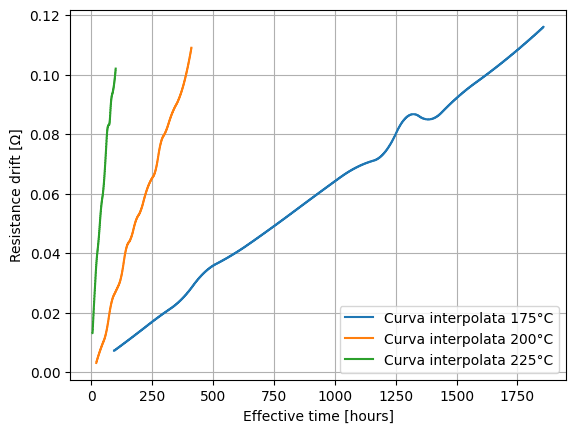

[np.float64(0.0073), np.float64(0.0073), np.float64(0.0073), np.float64(0.0073), np.float64(0.0074), np.float64(0.0074), np.float64(0.0074), np.float64(0.0074), np.float64(0.0074), np.float64(0.0075), np.float64(0.0075), np.float64(0.0075), np.float64(0.0075), np.float64(0.0076), np.float64(0.0076), np.float64(0.0076), np.float64(0.0076), np.float64(0.0076), np.float64(0.0077), np.float64(0.0077), np.float64(0.0077), np.float64(0.0077), np.float64(0.0077), np.float64(0.0078), np.float64(0.0078), np.float64(0.0078), np.float64(0.0078), np.float64(0.0078), np.float64(0.0079), np.float64(0.0079), np.float64(0.0079), np.float64(0.0079), np.float64(0.008), np.float64(0.008), np.float64(0.008), np.float64(0.008), np.float64(0.008), np.float64(0.0081), np.float64(0.0081), np.float64(0.0081), np.float64(0.0081), np.float64(0.0081), np.float64(0.0082), np.float64(0.0082), np.float64(0.0082), np.float64(0.0082), np.float64(0.0083), np.float64(0.0083), np.float64(0.0083), np.float64(0.0083), np.f

In [ ]:
csv_file = 'python1B.csv'
df = pd.read_csv(csv_file, sep=';')

low_temp_new = interpolazione(csv_file, 't eff. 175', 'DeltaR 175')
medium_temp_new = interpolazione(csv_file, 't eff. 200', 'DeltaR 200')
high_temp_new = interpolazione(csv_file, 't eff. 225', 'DeltaR 225')

x_new175 = low_temp_new[0]
y_new175 = low_temp_new[1]
x_new200 = medium_temp_new[0]
y_new200 = medium_temp_new[1]
x_new225 = high_temp_new[0]
y_new225 = high_temp_new[1]
print(df.columns)
#plot_interpolazione('python1A.csv', 't eff. 175', 'DeltaR 175')
#plot_interpolazione('python1A.csv', 't eff. 200', 'DeltaR 200')
#plot_interpolazione('python1A.csv', 't eff. 225', 'DeltaR 225')


#plt.plot(x_coords, y_coords, 'o', label='Punti originali')
plt.plot(x_new175, y_new175, '-', label='Curva interpolata 175°C')
plt.plot(x_new200, y_new200, '-', label='Curva interpolata 200°C')
plt.plot(x_new225, y_new225, '-', label='Curva interpolata 225°C')
plt.xlabel('Effective time [hours]')
plt.ylabel('Resistance drift [Ω]')
#plt.title('Grafico interpolato')
plt.grid(True)
plt.legend()
plt.show()


print(y_new175)

In [ ]:
temperature = [175, 200, 225]
Fattore_Accelerazione_preliminare = []
Asse_x_preliminare = []
Barre_errore_preliminare = []

for i in temperature:
  for j in temperature:
    if i != j:
      Asse_x_preliminare.append(differenza_reciproci(i, j))
      Fattore_Accelerazione_preliminare.append(define_acceleration_factor(i, j)[0])
      Barre_errore_preliminare.append(define_acceleration_factor(i, j)[1])

Fattore_Accelerazione = []
for i in Fattore_Accelerazione_preliminare:
  if i not in Fattore_Accelerazione:
    Fattore_Accelerazione.append(i)

Barre_errore = []
for i in Barre_errore_preliminare:
  if i not in Barre_errore:
    Barre_errore.append(i)

Asse_x = []
for i in Asse_x_preliminare:
  if i not in Asse_x:
    Asse_x.append(i)

funzione = sorted([(x ,y) for x, y in zip(Asse_x, Fattore_Accelerazione)])

print(Fattore_Accelerazione)
print(Barre_errore)
print(Asse_x)

#x_coords = [coord[0] for coord in funzione]
#y_coords = [math.log(coord[1]) for coord in funzione]

#plt.errorbar(x_coords, y_coords, yerr = Barre_errore, fmt='o', label='Punti originali')
#plt.plot(x_coords, y_coords)
#plt.xlabel('1/T1 - 1/T2')
#plt.ylabel('ln( Acceleration Factor )')
#plt.title('Grafico di funzione')
#plt.grid(True)
#plt.show()

#print(define_acceleration_factor(175, 225))

[np.float64(4.125809807211183), np.float64(19.49488550384131), np.float64(4.922430185807983)]
[np.float64(0.055764589525777834), np.float64(0.4150755821093442), np.float64(0.23139191187000727)]
[1.3686537387503208, 2.5998924434895705, 1.2312387047392497]


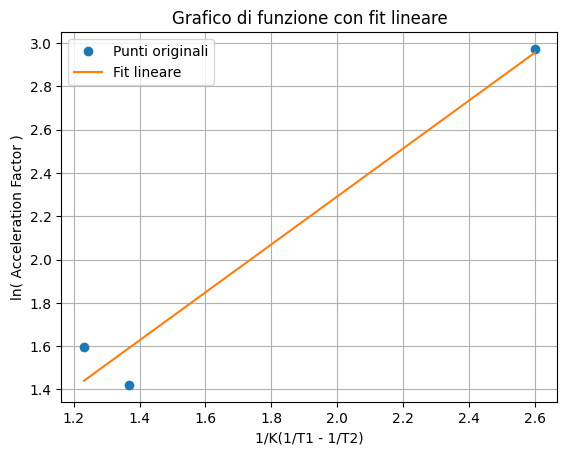

[1.10758858 0.07600776]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x_coords e y_coords sono le coordinate dei punti da fittare
x_coords = [coord[0] for coord in funzione]
y_coords = [math.log(coord[1]) for coord in funzione]

# Calcola i coefficienti del fit lineare (grado 1)
coefficients = np.polyfit(x_coords, y_coords, 1)

# Crea una funzione polinomiale dal fit
polynomial = np.poly1d(coefficients)

# Genera punti x per la linea del fit
x_fit = np.linspace(min(x_coords), max(x_coords), 100)

# Calcola i corrispondenti punti y usando la funzione polinomiale
y_fit = polynomial(x_fit)

# Plotta i punti originali e la linea del fit
plt.plot(x_coords, y_coords, 'o', label='Punti originali')
plt.plot(x_fit, y_fit, '-', label='Fit lineare')
plt.xlabel('1/K(1/T1 - 1/T2)')
plt.ylabel('ln( Acceleration Factor )')
plt.title('Grafico di funzione con fit lineare')
plt.grid(True)
plt.legend()
plt.show()

print(coefficients)

Coefficiente angolare: 1.002 +/- 0.174


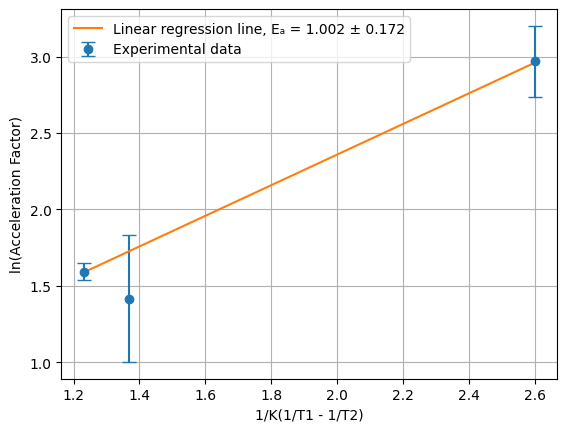

In [ ]:
from scipy.optimize import curve_fit

x_coords = [coord[0] for coord in funzione]
y_coords = [math.log(coord[1]) for coord in funzione]
yerr = Barre_errore


# Definisco la funzione per il fit lineare
def linear_func(x, a, b):
    return a * x + b

# Eseguo il fit lineare
popt, pcov = curve_fit(linear_func, x_coords, y_coords, sigma=yerr, absolute_sigma=True)

# Ottiengo il coefficiente angolare (a) e l'errore associato
slope = popt[0]
slope_err = np.sqrt(pcov[0, 0])

print(f"Coefficiente angolare: {slope:.3f} +/- {slope_err:.3f}")

# Procedo con il fit lineare generando valori su x e fittando la funzione lineare con i punti calcolati precendentemente
x_fit = np.linspace(min(x_coords), max(x_coords), 100)
y_fit = linear_func(x_fit, *popt)

# Plotto il grafico
plt.errorbar(x_coords, y_coords, yerr=yerr, fmt='o', capsize=5, label='Experimental data')
plt.plot(x_fit, y_fit, '-', label='Linear regression line, E\u2090 = 1.002 \u00B1 0.172')
plt.xlabel('1/K(1/T1 - 1/T2)')
plt.ylabel('ln(Acceleration Factor)')
#plt.title('Grafico di funzione con fit lineare')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(define_acceleration_factor(175, 200))
print(differenza_reciproci(175, 200))
print(define_acceleration_factor(200, 225))
print(differenza_reciproci(200, 225))
print(define_acceleration_factor(175, 225))
print(differenza_reciproci(175, 225))

energia_attivazione_lowtemp = math.log(define_acceleration_factor(175, 200)[0]) / differenza_reciproci(175, 200)
print(f'energia di attivazione tra 175 e 200 e di {energia_attivazione_lowtemp:.3f} eV')

(np.float64(4.125809807211183), np.float64(0.055764589525777834))
1.3686537387503208
(np.float64(4.922430185807983), np.float64(0.23139191187000727))
1.2312387047392497
(np.float64(19.49488550384131), np.float64(0.4150755821093442))
2.5998924434895705
energia di attivazione tra 175 e 200 e di 1.036 eV


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_coords, y_coords)
r_squared = r_value**2  # R-squared value
print(f"R-squared: {r_squared:.3f}")

R-squared: 0.962
